<a href="https://colab.research.google.com/github/randy-ar/gcolab/blob/main/Crime_Data_2020_LAPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [34]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download File Dataset

In [2]:
google_drive_file_id = "1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5"

In [ ]:
!pip install gdown

In [5]:
output_path = 'downloaded_file.csv'  # Anda bisa mengganti nama file output sesuai keinginan
gdown.download(f'https://drive.google.com/uc?id={google_drive_file_id}', output_path, quiet=False)

print(f"File berhasil didownload ke: {output_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5
From (redirected): https://drive.google.com/uc?id=1TpoTuymgEMyV5fLPJdkdwHRzjGey_hB5&confirm=t&uuid=76de9133-4166-422a-a1c2-7a8889e8d067
To: /content/downloaded_file.csv
100%|██████████| 255M/255M [00:02<00:00, 104MB/s]

File berhasil didownload ke: downloaded_file.csv


# Inisialisasi Dataframe

In [8]:
df_init = pd.read_csv('downloaded_file.csv')

In [20]:
df = df_init.copy()

# Preprocessing Data

## Nilai Null

In [13]:
df.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


## Format kolom

In [21]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
display(df.head())

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Format Tanggal

In [22]:
df['date_rptd'] = pd.to_datetime(df['date_rptd'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%m/%d/%Y')
df['date_occ'] = pd.to_datetime(df['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.strftime('%m/%d/%Y')
display(df.head())

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,211507896,04/11/2021,11/07/2020,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020,10/18/2020,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024,10/30/2020,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020,12/24/2020,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020,09/29/2020,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


## Mengisi nilai null modus operandi

In [28]:
df['mocodes'].unique()

array(['0377', '0416 0334 2004 1822 1414 0305 0319 0400', '0344', ...,
       '1258 0553 0602', '0400 1259 1822 0356', '0529 2024 1815 0913'],
      dtype=object)

In [23]:
if 0 in df['mocodes'].unique():
    print("Nilai '0' sudah ada di kolom 'mocodes'. Mengisi nilai null dengan '0' akan menimbulkan ambiguitas.")
else:
    print("Nilai '0' belum ada di kolom 'mocodes'. Anda bisa mengisi nilai null dengan '0'.")

Nilai '0' belum ada di kolom 'mocodes'. Anda bisa mengisi nilai null dengan '0'.


In [24]:
df['mocodes'] = df['mocodes'].fillna('0')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


## Mengisi nilai null Victim

In [25]:
df['vict_sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-'], dtype=object)

In [26]:
df['vict_descent'].unique()

array(['H', 'W', 'A', 'B', nan, 'X', 'O', 'C', 'J', 'V', 'K', 'F', 'I',
       'Z', 'L', 'G', 'P', 'D', 'U', 'S', '-'], dtype=object)

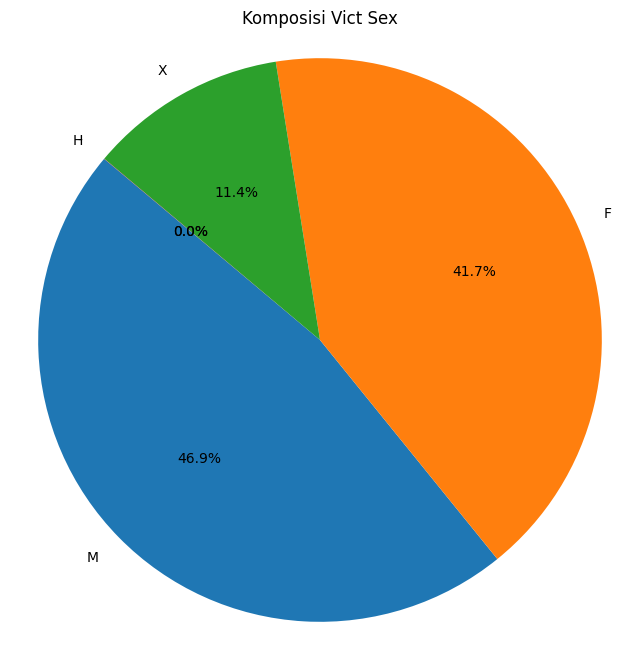

In [35]:
# Hitung komposisi vict_sex
sex_counts = df['vict_sex'].value_counts().reset_index()
sex_counts.columns = ['vict_sex', 'count']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts['count'], labels=sex_counts['vict_sex'], autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

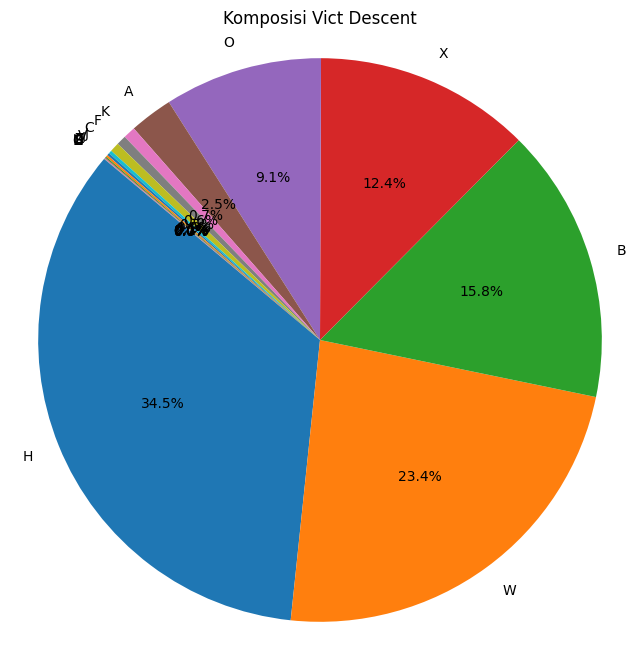

In [36]:
# Hitung komposisi vict_sex
race_count = df['vict_descent'].value_counts().reset_index()
race_count.columns = ['vict_descent', 'count']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_count['count'], labels=race_count['vict_descent'], autopct='%1.1f%%', startangle=140)
plt.title('Komposisi Vict Descent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [32]:
count_dash_sex = df[df['vict_sex'] == '-'].shape[0]
print(f"Jumlah baris dengan nilai '-' pada kolom 'vict_sex' adalah: {count_dash_sex}")

Jumlah baris dengan nilai '-' pada kolom 'vict_sex' adalah: 1


In [33]:
count_dash_sex = df[df['vict_descent'] == '-'].shape[0]
print(f"Jumlah baris dengan nilai '-' pada kolom 'vict_descent' adalah: {count_dash_sex}")

Jumlah baris dengan nilai '-' pada kolom 'vict_descent' adalah: 2


In [38]:
count_dash_sex = df[df['vict_descent'] == 'X'].shape[0]
print(f"Jumlah baris dengan nilai 'X' pada kolom 'vict_descent' adalah: {count_dash_sex}")

Jumlah baris dengan nilai 'X' pada kolom 'vict_descent' adalah: 106685


In [39]:
df['vict_sex'] = df['vict_sex'].fillna('X')
df['vict_sex'] = df['vict_sex'].replace('-', 'X')
display(df['vict_sex'].unique())
display(df.isnull().sum())

array(['M', 'F', 'X', 'H'], dtype=object)

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


In [40]:
df['vict_descent'] = df['vict_descent'].fillna('X')
df['vict_descent'] = df['vict_descent'].replace('-', 'X')
display(df['vict_descent'].unique())
display(df.isnull().sum())

array(['H', 'W', 'A', 'B', 'X', 'O', 'C', 'J', 'V', 'K', 'F', 'I', 'Z',
       'L', 'G', 'P', 'D', 'U', 'S'], dtype=object)

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


## Mengisi nilai null kolom lainnya

### Nilai null premis

In [43]:
0 in df['premis_cd'].unique()

True

In [44]:
df['premis_cd'] = df['premis_cd'].fillna(0)
0 in df['premis_cd'].unique()

True

In [52]:
df['premis_desc'] = df['premis_desc'].fillna('Unknown')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### Nilai null weapon

In [46]:
0 in df['weapon_used_cd'].unique()

False

In [47]:
df['weapon_used_cd'] = df['weapon_used_cd'].fillna(0)
0 in df['weapon_used_cd'].unique()

True

In [53]:
df['weapon_desc'] = df['weapon_desc'].fillna(df['weapon_used_cd'].apply(lambda x: 'Unknown' if x == 0 else pd.NA))
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### Nilai null status

In [54]:
df['status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO', 'CC', nan], dtype=object)

In [56]:
df['status'] = df['status'].fillna('X')
df['status'].unique()

array(['IC', 'AO', 'AA', 'JA', 'JO', 'CC', 'X'], dtype=object)

### nilai null crm 1

In [57]:
df['crm_cd_1'] = df['crm_cd_1'].fillna(df['crm_cd'])
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


 ### nilai crm 2, 3, 4

In [59]:
0 in df['crm_cd'].unique()

False

In [60]:
df[['crm_cd_2', 'crm_cd_3', 'crm_cd_4']] = df[['crm_cd_2', 'crm_cd_3', 'crm_cd_4']].fillna(0)
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0


### nilai null cross_street

In [61]:
df['cross_street'] = df['cross_street'].fillna('Unknown')
display(df.isnull().sum())

,0
dr_no,0
date_rptd,0
date_occ,0
time_occ,0
area,0
area_name,0
rpt_dist_no,0
part_1-2,0
crm_cd,0
crm_cd_desc,0
